# Procesamiento de datos

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
# Read de data
path = os.path.join(os.getcwd(), os.pardir, 'data', 'raw')
df_schema = pd.read_csv(os.path.join(path, 'survey_results_schema.csv'))
df_survey = pd.read_csv(os.path.join(path, 'survey_results_public.csv'))

### Filtro de datos

El `df_schema` contiene las preguntas usadas en la encuesta.

In [ ]:
# Explore what data to use
cols = ['qname', 'question']
df_schema[cols]

,qname,question
0,S0,"<div><span style=""font-size:19px;""><strong>Hel..."
1,MetaInfo,Browser Meta Info
2,S1,"<span style=""font-size:22px; font-family: aria..."
3,MainBranch,Which of the following options best describes ...
4,Employment,Which of the following best describes your cur...
5,Country,"Where do you live? <span style=""font-weight: b..."
6,US_State,<p>In which state or territory of the USA do y...
7,UK_Country,In which part of the United Kingdom do you liv...
8,S2,"<span style=""font-size:22px; font-family: aria..."
9,EdLevel,Which of the following best describes the high...


In [ ]:
df_survey.sample(5)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
12141,12142,"I am not primarily a developer, but I write co...","Student, full-time",Saudi Arabia,NaN,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",2,...,18-24 years old,Man,No,NaN,Middle Eastern,NaN,NaN,NaN,NaN,NaN
9237,9238,I am a student who is learning to code,"Student, full-time",Germany,NaN,NaN,Some college/university study without earning ...,11 - 17 years,"Other online resources (ex: videos, blogs, etc...",5,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
72632,72633,I am a developer by profession,Employed full-time,India,NaN,NaN,Some college/university study without earning ...,18 - 24 years,Online Forum;Friend or family member;Colleague,5,...,25-34 years old,Man,No,Straight / Heterosexual,"Or, in your own words:",None of the above,None of the above,Appropriate in length,Easy,NaN
77706,77707,I am a developer by profession,Employed full-time,Russian Federation,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,School;Books / Physical media,20,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Too short,Easy,28800.0
1122,1123,I am a developer by profession,Employed full-time,India,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",8,...,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Appropriate in length,Easy,NaN


Seleccionar las columnas que pueden ayudar a contestar las preguntas (mostradas en el siguiente notebook). Y también los países hispanohablantes para filtrar la data (también se incluyó a Brasil).

In [ ]:
# Select columns
columns = ['ResponseId', 'Age', 'Gender', 'Trans', 'Sexuality', 'Country',
            'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode', 'YearsCodePro',
            'MainBranch', 'Employment', 'DevType', 'ConvertedCompYearly']

# Filter registers by countries
latam = ['Peru', 'Colombia', 'Chile', 'Argentina', 'Costa Rica', 'Bolivia',
            'Uruguay', 'Mexico', 'Venezuela, Bolivarian Republic of...'
            'Dominican Republic', 'Ecuador', 'Guatemala', 'Paraguay', 'Panama',
            'El Salvador', 'Nicaragua', 'Brazil', 'Spain']

# New dataset
in_latam = df_survey.Country.isin(latam)
df = df_survey[in_latam][columns]

In [ ]:
s = df.shape
p = s[0] / df_survey.shape[0] * 100
print(f'Registros: {s[0]}')
print(f'Porcentaje total del dataset: {round(p,2)}%')
print(f'Preguntas: {s[1]}')

Registros: 6337
Porcentaje total del dataset: 7.59%
Preguntas: 15


Veamos los tipos de datos y qué contienen las variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6337 entries, 11 to 83438
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ResponseId           6337 non-null   int64  
 1   Age                  6307 non-null   object 
 2   Gender               6305 non-null   object 
 3   Trans                6244 non-null   object 
 4   Sexuality            5885 non-null   object 
 5   Country              6337 non-null   object 
 6   EdLevel              6322 non-null   object 
 7   Age1stCode           6330 non-null   object 
 8   LearnCode            6316 non-null   object 
 9   YearsCode            6254 non-null   object 
 10  YearsCodePro         5160 non-null   object 
 11  MainBranch           6337 non-null   object 
 12  Employment           6335 non-null   object 
 13  DevType              5554 non-null   object 
 14  ConvertedCompYearly  4389 non-null   float64
dtypes: float64(1), int64(1), object(13)


In [ ]:
df.describe(include='all')

,ResponseId,Age,Gender,Trans,Sexuality,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,MainBranch,Employment,DevType,ConvertedCompYearly
count,6337.000000,6307,6305,6244,5885,6337,6322,6330,6316,6254,5160,6337,6335,5554,4.389000e+03
unique,NaN,8,11,4,21,16,9,9,306,51,43,6,9,1519,NaN
top,NaN,25-34 years old,Man,No,Straight / Heterosexual,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,School,10,3,I am a developer by profession,Employed full-time,"Developer, full-stack",NaN
freq,NaN,2695,5870,6075,5070,2254,2535,3384,614,514,481,4848,4381,688,NaN
mean,41783.380306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.906398e+04
std,22858.458387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.371509e+05
min,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.200000e+01
25%,25064.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.567200e+04
50%,40617.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.810500e+04
75%,60783.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.718400e+04


Hay algunas columnas que podrían ser numéricas, pero están como categóricas, ¿por qué?

In [ ]:
df.YearsCode.value_counts().sort_values().head()

48                    1
50                    1
More than 50 years    1
47                    1
44                    2
Name: YearsCode, dtype: int64

In [ ]:
df.YearsCodePro.value_counts().sort_values().head()

38                    1
43                    1
More than 50 years    1
42                    2
34                    5
Name: YearsCodePro, dtype: int64

Como solo hay 1 valor de "más de 50 años" para cada columna, se lo reemplazará con `50`. Y los valores de "menos de 1 año" con `0.5`. De esa manera se podrá tener columnas numéricas.

In [ ]:
df['YearsCode'] = pd.to_numeric(df.YearsCode.replace(['More than 50 years', 'Less than 1 year'], [50, 0.5]))
df['YearsCodePro'] = pd.to_numeric(df.YearsCodePro.replace(['More than 50 years', 'Less than 1 year'], [50, 0.5]))

Otro estadístico que podría sesgar los datos es el salario, tiene una desviación estándar muy grande (137150). Revisemos los valores:

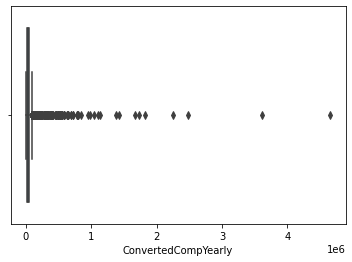

In [ ]:
sns.boxplot(x='ConvertedCompYearly', data=df)
plt.show()

El dataset tiene varios outliers en el sueldo. No son útiles para fines de esta investigación, así que se eliminará los valores superiores al 97.5% percentil.

In [ ]:
df.ConvertedCompYearly.dropna().describe(percentiles=[0.975])

count    4.389000e+03
mean     4.906398e+04
std      1.371509e+05
min      1.200000e+01
50%      2.810500e+04
97.5%    2.000000e+05
max      4.656132e+06
Name: ConvertedCompYearly, dtype: float64

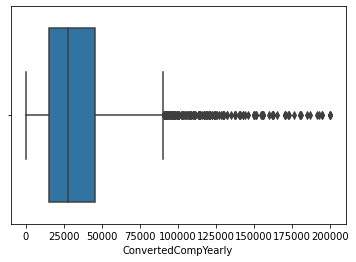

In [ ]:
df.drop(df[df.ConvertedCompYearly > 200000].index, inplace=True)
sns.boxplot(x='ConvertedCompYearly', data=df)
plt.show()

### Reducir categorías

Hay varias preguntas que tienen múltiples opciones, pero son bajas porcentualmente. Se las reducirá a menos categorías para simplificar el análisis.

#### Género

In [ ]:
df.Gender.value_counts(normalize=True)

Man                                                                         0.930923
Woman                                                                       0.039380
Prefer not to say                                                           0.009522
Non-binary, genderqueer, or gender non-conforming                           0.007586
Man;Or, in your own words:                                                  0.004035
Or, in your own words:                                                      0.003389
Man;Non-binary, genderqueer, or gender non-conforming                       0.002905
Woman;Non-binary, genderqueer, or gender non-conforming                     0.001453
Man;Woman;Non-binary, genderqueer, or gender non-conforming                 0.000323
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:    0.000323
Man;Woman                                                                   0.000161
Name: Gender, dtype: float64

In [ ]:
df.Gender.where(df.Gender.isin(['Man', 'Woman']), 'Other', inplace=True)
df.Gender.value_counts(normalize=True)

Man      0.926140
Woman    0.039178
Other    0.034682
Name: Gender, dtype: float64

#### Edad

In [ ]:
df.Age.value_counts(normalize=True)

25-34 years old       0.424907
18-24 years old       0.244556
35-44 years old       0.211808
45-54 years old       0.070173
Under 18 years old    0.030973
55-64 years old       0.013712
Prefer not to say     0.002581
65 years or older     0.001291
Name: Age, dtype: float64

In [ ]:
df.Age.where(~(df.Age.isin(['45-54 years old', '55-64 years old', '65 years or older'])), '> 45 years old', inplace=True)
df.Age.value_counts(normalize=True)

25-34 years old       0.424907
18-24 years old       0.244556
35-44 years old       0.211808
> 45 years old        0.085175
Under 18 years old    0.030973
Prefer not to say     0.002581
Name: Age, dtype: float64

#### Sexuality

In [ ]:
df.Sexuality.value_counts(normalize=True)

Straight / Heterosexual                                   0.861515
Bisexual                                                  0.048064
Prefer not to say                                         0.030256
Gay or Lesbian                                            0.026107
Prefer to self-describe:                                  0.013140
Straight / Heterosexual;Bisexual                          0.007261
Queer                                                     0.003631
Straight / Heterosexual;Prefer to self-describe:          0.002766
Bisexual;Queer                                            0.002248
Bisexual;Gay or Lesbian                                   0.000864
Bisexual;Prefer to self-describe:                         0.000692
Gay or Lesbian;Queer                                      0.000692
Bisexual;Gay or Lesbian;Queer                             0.000519
Straight / Heterosexual;Queer                             0.000519
Bisexual;Prefer to self-describe:;Gay or Lesbian;Queer    0.00

In [ ]:
df.Sexuality.where(df.Sexuality.isin(['Straight / Heterosexual']), 'LGBT / Non-hetero', inplace=True)
df.Sexuality.value_counts(normalize=True)

Straight / Heterosexual    0.800096
LGBT / Non-hetero          0.199904
Name: Sexuality, dtype: float64

#### Edad de la primera línea de código

In [ ]:
df.Age1stCode.value_counts(normalize=True)

11 - 17 years           0.535284
18 - 24 years           0.278251
5 - 10 years            0.096769
25 - 34 years           0.049670
35 - 44 years           0.019450
45 - 54 years           0.009002
Younger than 5 years    0.007555
55 - 64 years           0.003536
Older than 64 years     0.000482
Name: Age1stCode, dtype: float64

In [ ]:
df.Age1stCode.where(~(df.Age1stCode.isin(['45 - 54 years', '55 - 64 years', 'Older than 64 years'])), '> 45 years', inplace=True)
df.Age1stCode.where(~(df.Age1stCode.isin(['5 - 10 years', 'Younger than 5 years'])), '< 10 years', inplace=True)
df.Age1stCode.where(~(df.Age1stCode.isin(['25 - 34 years', '35 - 44 years'])), '25 - 44 years', inplace=True)
df.Age1stCode.value_counts(normalize=True)

11 - 17 years    0.535284
18 - 24 years    0.278251
< 10 years       0.104324
25 - 44 years    0.069121
> 45 years       0.013020
Name: Age1stCode, dtype: float64

#### Empleo

In [ ]:
df.Employment.value_counts(normalize=True)

Employed full-time                                      0.688082
Independent contractor, freelancer, or self-employed    0.122069
Student, full-time                                      0.082878
Employed part-time                                      0.035496
Not employed, but looking for work                      0.033569
Student, part-time                                      0.023450
Not employed, and not looking for work                  0.008191
I prefer not to say                                     0.004819
Retired                                                 0.001446
Name: Employment, dtype: float64

In [ ]:
df.Employment.where(~(df.Employment.isin(['Employed full-time', 'Employed part-time'])), 'Employed', inplace=True)
df.Employment.where(~(df.Employment.isin(['Student, full-time', 'Student, part-time'])), 'Student', inplace=True)
df.Employment.where(~(df.Employment.isin(['Not employed, but looking for work', 'Not employed, and not looking for work', 'Retired'])), \
                    'Not employed', inplace=True)
df.Employment.value_counts(normalize=True)

Employed                                                0.723579
Independent contractor, freelancer, or self-employed    0.122069
Student                                                 0.106328
Not employed                                            0.043206
I prefer not to say                                     0.004819
Name: Employment, dtype: float64

### Múltiples respuestas

`DevType` y ` LearnCode` las tienen, quizá no se pueda limpiar directamente, pero más adelante se puede aplicar esta función para crear DataFrames nuevos y analizarlas por separado:

```
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]
```

#### Tipo de desarrollador

In [ ]:
df.DevType.value_counts(normalize=True)

Developer, full-stack                                                                                                                                                                                   0.123416
Developer, back-end                                                                                                                                                                                     0.086318
Developer, front-end                                                                                                                                                                                    0.032507
Developer, front-end;Developer, full-stack;Developer, back-end                                                                                                                                          0.032140
Developer, full-stack;Developer, back-end                                                                                                                           

#### Dónde aprendió a programar

`[]` Aquí hay que agrupar por tradicional, online o autodidacta. Hay que hacer recuento para poder sacar el porcentaje de cada uno.

In [ ]:
df.LearnCode.value_counts(normalize=True)

School                                                                                                                                                                 0.096343
Other online resources (ex: videos, blogs, etc)                                                                                                                        0.041083
Books / Physical media                                                                                                                                                 0.035605
School;Books / Physical media                                                                                                                                          0.031738
Other online resources (ex: videos, blogs, etc);School;Online Courses or Certification;Books / Physical media                                                          0.028033
                                                                                                                        

### Agregar data

Columna para conocer cuántos años tomó desde que se aprendió a programar hasta que se lo hizo profesionalmente.

In [ ]:
df['YearsLearnPro'] = abs(df.YearsCode - df.YearsCodePro)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6228 entries, 11 to 83438
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ResponseId           6228 non-null   int64  
 1   Age                  6199 non-null   object 
 2   Gender               6228 non-null   object 
 3   Trans                6135 non-null   object 
 4   Sexuality            6228 non-null   object 
 5   Country              6228 non-null   object 
 6   EdLevel              6213 non-null   object 
 7   Age1stCode           6221 non-null   object 
 8   LearnCode            6207 non-null   object 
 9   YearsCode            6145 non-null   float64
 10  YearsCodePro         5052 non-null   float64
 11  MainBranch           6228 non-null   object 
 12  Employment           6226 non-null   object 
 13  DevType              5445 non-null   object 
 14  ConvertedCompYearly  4280 non-null   float64
 15  YearsLearnPro        5044 non-null  

El dataset está listo para poder trabajar.

In [ ]:
path_processed = os.path.join(os.getcwd(), os.pardir, 'data', 'processed')
df.to_csv(os.path.join(path_processed, 'survey.csv'), index=None)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=09491c61-3767-4289-98fd-88aee19bb45d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>